In [1]:
import warnings
warnings.filterwarnings("ignore")
from DeepPurpose import utils, models, dataset

In [2]:
import numpy as np
import pandas as pd
import json
import os 
print(os.path.abspath('.'))

/home/gdp/data/DeepPurpose0


In [3]:
affinity = pd.read_csv('VAE_data/affinity.txt', header=None, sep = '\t')
affinity = affinity.fillna(-1)

with open('VAE_data/target_seq.txt') as f:
    target = json.load(f)

with open('VAE_data/SMILES.txt') as f:
    drug = json.load(f)

target = list(target.values())
drug = list(drug.values())

SMILES = []
Target_seq = []
y = []

for i in range(len(drug)):
    for j in range(len(target)):
        if affinity.values[i, j] != -1:
            SMILES.append(drug[i])
            Target_seq.append(target[j])
            y.append(affinity.values[i, j])

Smile, Target, y = np.array(SMILES), np.array(Target_seq), np.array(y)
print('Done!')

Done!


In [4]:
X_drugs, X_targets, y = Smile, Target, y
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Drug 1: COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
Target 1: MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACKHPEVQSILKISQPQEPELMNANPSPPPSPSQQINLGPSSNPHAKPSDFHFLKVIGKGSFGKVLLARHKAEEVFYAVKVLQKKAILKKKEEKHIMSERNVLLKNVKHPFLVGLHFSFQTADKLYFVLDYINGGELFYHLQRERCFLEPRARFYAAEIASALGYLHSLNIVYRDLKPENILLDSQGHIVLTDFGLCKENIEHNSTTSTFCGTPEYLAPEVLHKQPYDRTVDWWCLGAVLYEMLYGLPPFYSRNTAEMYDNILNKPLQLKPNITNSARHLLEGLLQKDRTKRLGAKDDFMEIKSHVFFSLINWDDLINKKITPPFNPNVSGPNDLRHFDPEFTEEPVPNSIGKSPDSVLVTASVKEAAEAFLGFSYAPPTDSFL
Score 1: 11.1


In [5]:
drug_encoding, target_encoding = 'Daylight', 'AAC'

In [6]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='train_full',frac=[0.8,0.1,0.1],# this is the main point!
                                random_seed = 1)
train.head(1)

in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.					 Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.1,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[6.497, 3.944, 5.8, 4.408, 1.16, 6.265, 3.248,..."


In [7]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         #cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 300, 
                         #test_every_X_epoch = 10, 
                         LR = 0.001, 
                         #decay = 0.0001,
                         batch_size = 512
                              )

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 138.632. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.19391. Total time 0.00638 hours
Training at Epoch 1 iteration 200 with loss 1.03928. Total time 0.01277 hours
Validation at Epoch 1 , MSE: 0.55265 , Pearson Correlation: 0.46925 with p-value: 0.0 , Concordance Index: 0.69792
Training at Epoch 2 iteration 0 with loss 0.92393. Total time 0.01638 hours
Training at Epoch 2 iteration 100 with loss 0.97593. Total time 0.02277 hours
Training at Epoch 2 iteration 200 with loss 0.76793. Total time 0.02916 hours
Validation at Epoch 2 , MSE: 0.44236 , Pearson Correlation: 0.61589 with p-value: 0.0 , Concordance Index: 0.74300
Training at Epoch 3 iteration 0 with loss 0.57008. Total time 0.0325 hours
Training at Epoch 3 iteration 100 with loss 0.75094. Total time 0.03861 hours
Training at Epoch 3 iteration 200 with loss 0.61568. Total time 0.045 hours
Validation at E

Training at Epoch 23 iteration 0 with loss 0.40130. Total time 0.35472 hours
Training at Epoch 23 iteration 100 with loss 0.40540. Total time 0.36111 hours
Training at Epoch 23 iteration 200 with loss 0.49404. Total time 0.3675 hours
Validation at Epoch 23 , MSE: 0.30809 , Pearson Correlation: 0.78393 with p-value: 0.0 , Concordance Index: 0.81228
EarlyStopping counter: 5 out of 10
Training at Epoch 24 iteration 0 with loss 0.48631. Total time 0.37111 hours
Training at Epoch 24 iteration 100 with loss 0.41119. Total time 0.3775 hours
Training at Epoch 24 iteration 200 with loss 0.50592. Total time 0.38388 hours
Validation at Epoch 24 , MSE: 0.36994 , Pearson Correlation: 0.78732 with p-value: 0.0 , Concordance Index: 0.81609
EarlyStopping counter: 6 out of 10
Training at Epoch 25 iteration 0 with loss 0.45418. Total time 0.3875 hours
Training at Epoch 25 iteration 100 with loss 0.44793. Total time 0.39361 hours
Training at Epoch 25 iteration 200 with loss 0.42691. Total time 0.4 hours


Training at Epoch 45 iteration 0 with loss 0.35612. Total time 0.71194 hours
Training at Epoch 45 iteration 100 with loss 0.30341. Total time 0.71833 hours
Training at Epoch 45 iteration 200 with loss 0.24195. Total time 0.72472 hours
Validation at Epoch 45 , MSE: 0.25012 , Pearson Correlation: 0.84108 with p-value: 0.0 , Concordance Index: 0.83875
EarlyStopping counter: 2 out of 10
Training at Epoch 46 iteration 0 with loss 0.33197. Total time 0.72805 hours
Training at Epoch 46 iteration 100 with loss 0.27134. Total time 0.73416 hours
Training at Epoch 46 iteration 200 with loss 0.28341. Total time 0.74055 hours
Validation at Epoch 46 , MSE: 0.20356 , Pearson Correlation: 0.84276 with p-value: 0.0 , Concordance Index: 0.84232
Training at Epoch 47 iteration 0 with loss 0.29149. Total time 0.74416 hours
Training at Epoch 47 iteration 100 with loss 0.30075. Total time 0.75083 hours
Training at Epoch 47 iteration 200 with loss 0.31928. Total time 0.75694 hours
Validation at Epoch 47 , MSE

Validation at Epoch 67 , MSE: 0.14518 , Pearson Correlation: 0.89337 with p-value: 0.0 , Concordance Index: 0.86909
Training at Epoch 68 iteration 0 with loss 0.22615. Total time 1.0775 hours
Training at Epoch 68 iteration 100 with loss 0.24572. Total time 1.08388 hours
Training at Epoch 68 iteration 200 with loss 0.19755. Total time 1.09027 hours
Validation at Epoch 68 , MSE: 0.15304 , Pearson Correlation: 0.89609 with p-value: 0.0 , Concordance Index: 0.87478
EarlyStopping counter: 1 out of 10
Training at Epoch 69 iteration 0 with loss 0.30095. Total time 1.09361 hours
Training at Epoch 69 iteration 100 with loss 0.24680. Total time 1.09972 hours
Training at Epoch 69 iteration 200 with loss 0.23472. Total time 1.10583 hours
Validation at Epoch 69 , MSE: 0.14917 , Pearson Correlation: 0.89315 with p-value: 0.0 , Concordance Index: 0.86986
EarlyStopping counter: 2 out of 10
Training at Epoch 70 iteration 0 with loss 0.24455. Total time 1.10916 hours
Training at Epoch 70 iteration 100 w

Validation at Epoch 89 , MSE: 0.10366 , Pearson Correlation: 0.92566 with p-value: 0.0 , Concordance Index: 0.89686
EarlyStopping counter: 1 out of 10
Training at Epoch 90 iteration 0 with loss 0.17543. Total time 1.42305 hours
Training at Epoch 90 iteration 100 with loss 0.19597. Total time 1.42916 hours
Training at Epoch 90 iteration 200 with loss 0.17268. Total time 1.43527 hours
Validation at Epoch 90 , MSE: 0.09803 , Pearson Correlation: 0.92974 with p-value: 0.0 , Concordance Index: 0.90110
Training at Epoch 91 iteration 0 with loss 0.17530. Total time 1.43861 hours
Training at Epoch 91 iteration 100 with loss 0.19517. Total time 1.44472 hours
Training at Epoch 91 iteration 200 with loss 0.15833. Total time 1.45083 hours
Validation at Epoch 91 , MSE: 0.09733 , Pearson Correlation: 0.92824 with p-value: 0.0 , Concordance Index: 0.89776
Training at Epoch 92 iteration 0 with loss 0.15844. Total time 1.45416 hours
Training at Epoch 92 iteration 100 with loss 0.17833. Total time 1.460

Training at Epoch 112 iteration 0 with loss 0.10964. Total time 1.76638 hours
Training at Epoch 112 iteration 100 with loss 0.10667. Total time 1.7725 hours
Training at Epoch 112 iteration 200 with loss 0.10318. Total time 1.77861 hours
Validation at Epoch 112 , MSE: 0.07206 , Pearson Correlation: 0.94863 with p-value: 0.0 , Concordance Index: 0.91644
Training at Epoch 113 iteration 0 with loss 0.13761. Total time 1.78194 hours
Training at Epoch 113 iteration 100 with loss 0.12265. Total time 1.78805 hours
Training at Epoch 113 iteration 200 with loss 0.11041. Total time 1.79444 hours
Validation at Epoch 113 , MSE: 0.07367 , Pearson Correlation: 0.94610 with p-value: 0.0 , Concordance Index: 0.91111
EarlyStopping counter: 1 out of 10
Training at Epoch 114 iteration 0 with loss 0.13316. Total time 1.79805 hours
Training at Epoch 114 iteration 100 with loss 0.11963. Total time 1.80416 hours
Training at Epoch 114 iteration 200 with loss 0.12771. Total time 1.81027 hours
Validation at Epoc

Training at Epoch 134 iteration 0 with loss 0.11101. Total time 2.11361 hours
Training at Epoch 134 iteration 100 with loss 0.10752. Total time 2.11972 hours
Training at Epoch 134 iteration 200 with loss 0.10619. Total time 2.12583 hours
Validation at Epoch 134 , MSE: 0.05699 , Pearson Correlation: 0.95969 with p-value: 0.0 , Concordance Index: 0.92544
EarlyStopping counter: 2 out of 10
Training at Epoch 135 iteration 0 with loss 0.10732. Total time 2.12916 hours
Training at Epoch 135 iteration 100 with loss 0.14063. Total time 2.13555 hours
Training at Epoch 135 iteration 200 with loss 0.09029. Total time 2.14194 hours
Validation at Epoch 135 , MSE: 0.05158 , Pearson Correlation: 0.96295 with p-value: 0.0 , Concordance Index: 0.92895
Training at Epoch 136 iteration 0 with loss 0.08720. Total time 2.14527 hours
Training at Epoch 136 iteration 100 with loss 0.09598. Total time 2.15138 hours
Training at Epoch 136 iteration 200 with loss 0.10888. Total time 2.1575 hours
Validation at Epoc

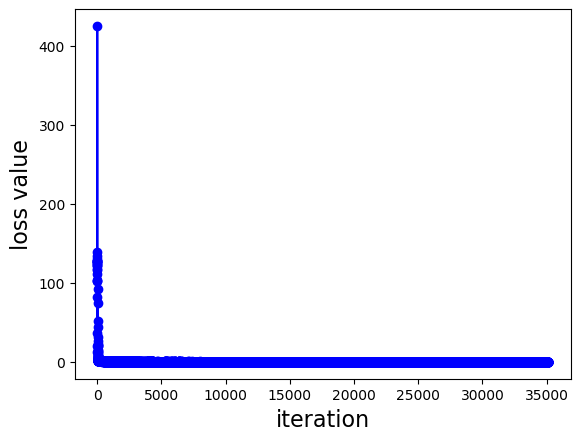

In [9]:
model = models.model_initialize(**config)
model.train(train, val, train)

In [10]:
model.save_model('./model_Daylight_AAC')

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.09553. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.10593. Total time 0.00694 hours
Training at Epoch 1 iteration 200 with loss 0.11120. Total time 0.01388 hours
Validation at Epoch 1 , MSE: 0.05207 , Pearson Correlation: 0.96327 with p-value: 0.0 , Concordance Index: 0.93079
Training at Epoch 2 iteration 0 with loss 0.10533. Total time 0.01805 hours
Training at Epoch 2 iteration 100 with loss 0.09662. Total time 0.02527 hours
Training at Epoch 2 iteration 200 with loss 0.10176. Total time 0.03222 hours
Validation at Epoch 2 , MSE: 0.05323 , Pearson Correlation: 0.96204 with p-value: 0.0 , Concordance Index: 0.92832
EarlyStopping counter: 1 out of 10
Training at Epoch 3 iteration 0 with loss 0.09623. Total time 0.03583 hours
Training at Epoch 3 iteration 100 with loss 0.10385. Total time 0.04277 hours
Training at Epoch 3 iteration 200 with loss 0.13781. To

Training at Epoch 23 iteration 0 with loss 0.09164. Total time 0.37861 hours
Training at Epoch 23 iteration 100 with loss 0.09005. Total time 0.38527 hours
Training at Epoch 23 iteration 200 with loss 0.08318. Total time 0.39222 hours
Validation at Epoch 23 , MSE: 0.04818 , Pearson Correlation: 0.96660 with p-value: 0.0 , Concordance Index: 0.93374
EarlyStopping counter: 3 out of 10
Training at Epoch 24 iteration 0 with loss 0.09162. Total time 0.39583 hours
Training at Epoch 24 iteration 100 with loss 0.09762. Total time 0.4025 hours
Training at Epoch 24 iteration 200 with loss 0.09149. Total time 0.40944 hours
Validation at Epoch 24 , MSE: 0.04870 , Pearson Correlation: 0.96580 with p-value: 0.0 , Concordance Index: 0.93252
EarlyStopping counter: 4 out of 10
Training at Epoch 25 iteration 0 with loss 0.13795. Total time 0.41305 hours
Training at Epoch 25 iteration 100 with loss 0.10043. Total time 0.42 hours
Training at Epoch 25 iteration 200 with loss 0.10062. Total time 0.42722 hou

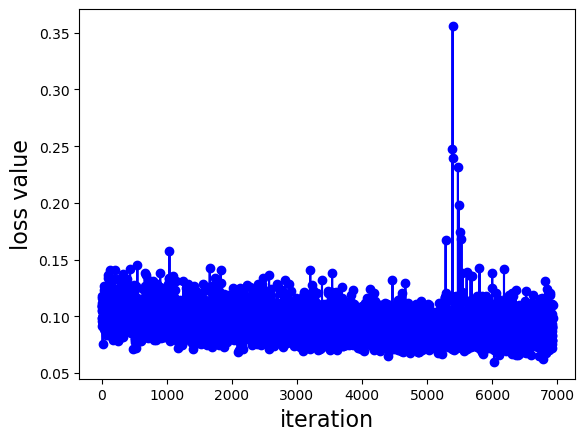

In [8]:
model = models.model_pretrained(path_dir='./model_Daylight_AAC')
model.config['train_epoch']=200
model.train(train, val, train)

In [9]:
model.save_model('./model_Daylight_AAC-300+200')